# MLP on 80/20 Data Splitting Approach

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from keras.models import load_model

In [4]:
import joblib

Need to preprocess the data again cause not able to open the file 'all_data_final' because of its size

In [6]:
def get_feature_types(df):
    numerical_features = []
    categorical_features = []
    boolean_features = []
    for column_name, column_type in df.dtypes.items():
        if column_type in ['int64', 'float64']:
            numerical_features.append(column_name)
        elif column_type == 'object':
            categorical_features.append(column_name)
        elif column_type == 'bool':
            boolean_features.append(column_name)
    return numerical_features, categorical_features, boolean_features

numerical_features, categorical_features, boolean_features = get_feature_types(data)

def one_hot_encode_features(data, categorical_features):
    if 'label' in categorical_features:
        categorical_features.remove('label')
    if 'subcategory' in categorical_features:
        categorical_features.remove('subcategory')
    data = pd.get_dummies(data, columns=categorical_features, drop_first=True)
    return data

data = one_hot_encode_features(data, categorical_features)
data.fillna(0, inplace=True)

['PDU Type', 'Info', 'Channel Selection Algorithm', 'Tx Address', 'Rx Address', 'Simultaneous LE and BR/EDR to Same Device Capable (Host)', 'Simultaneous LE and BR/EDR to Same Device Capable (Controller)', 'BR/EDR Not Supported', 'LE General Discoverable Mode', 'LE Limited Discoverable Mode', 'label', 'subcategory', 'Packet Direction']
Total number of rows: 901623
Rows with NaN values:


Split into X=features and y=labels

In [7]:
X = data.drop(columns=['label', 'subcategory']).values
y = data['label'].values

SAVE X and y

In [8]:
joblib.dump(X, 'csv 20 minutes/labeled2/features_final/together/X_MLP.pkl')
joblib.dump(y, 'csv 20 minutes/labeled2/features_final/together/y_MLP.pkl')

['csv 20 minutes/labeled2/features_final/together/y_MLP.pkl']

LOAD X and y

In [6]:
X = joblib.load('csv 20 minutes/labeled2/features_final/together/X_MLP.pkl')
y = joblib.load('csv 20 minutes/labeled2/features_final/together/y_MLP.pkl')

Preprocess according to paper

In [7]:
# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized = X_normalized.astype(np.float32)

# Transform the labels to integers using label encoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Transform the labels using one-hot encoding
num_classes = len(label_encoder.classes_)
y_categorical = to_categorical(y_encoded, num_classes=num_classes)

# Split data based on 80/20 data splitting method

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_normalized, y_categorical, test_size=0.1, random_state=42)

SAVE

In [9]:
joblib.dump(X_train1, 'csv 20 minutes/labeled2/features_final/together/X_MLP_train1.pkl')
joblib.dump(X_test1, 'csv 20 minutes/labeled2/features_final/together/X_MLP_test1.pkl')
joblib.dump(y_train1, 'csv 20 minutes/labeled2/features_final/together/y_MLP_train1.pkl')
joblib.dump(y_test1, 'csv 20 minutes/labeled2/features_final/together/y_MLP_test1.pkl')

['csv 20 minutes/labeled2/features_final/together/y_MLP_test1.pkl']

LOAD

In [8]:
X_train1 = joblib.load('csv 20 minutes/labeled2/features_final/together/X_MLP_train1.pkl')
X_test1 = joblib.load('csv 20 minutes/labeled2/features_final/together/X_MLP_test1.pkl')
y_train1 = joblib.load('csv 20 minutes/labeled2/features_final/together/y_MLP_train1.pkl')
y_test1 = joblib.load('csv 20 minutes/labeled2/features_final/together/y_MLP_test1.pkl')

# TRAIN MLP

Same model structure as from paper

In [10]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_normalized.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(X_train1, y_train1, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
20287/20287 ━━━━━━━━━━━━━━━━━━━━ 28s 1ms/step - accuracy: 0.9762 - loss: 0.1139 - val_accuracy: 0.9970 - val_loss: 0.0124
Epoch 2/50
20287/20287 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - accuracy: 0.9956 - loss: 0.0197 - val_accuracy: 0.9970 - val_loss: 0.0115
Epoch 3/50
20287/20287 ━━━━━━━━━━━━━━━━━━━━ 28s 1ms/step - accuracy: 0.9961 - loss: 0.0172 - val_accuracy: 0.9974 - val_loss: 0.0081
Epoch 4/50
20287/20287 ━━━━━━━━━━━━━━━━━━━━ 28s 1ms/step - accuracy: 0.9964 - loss: 0.0190 - val_accuracy: 0.9976 - val_loss: 0.0088
Epoch 5/50
20287/20287 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step - accuracy: 0.9967 - loss: 0.0227 - val_accuracy: 0.9975 - val_loss: 0.0089
Epoch 6/50
20287/20287 ━━━━━━━━━━━━━━━━━━━━ 28s 1ms/step - accuracy: 0.9969 - loss: 0.0206 - val_accuracy: 0.9975 - val_loss: 0.0101
Epoch 7/50
20287/20287 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - accuracy: 0.9968 - loss: 0.0187 - val_accuracy: 0.9977 - val_loss: 0.0087
Epoch 8/50
20287/20287 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - accuracy: 

Epoch 50/50
20287/20287 ━━━━━━━━━━━━━━━━━━━━ 27s 1ms/step - accuracy: 0.9965 - loss: 0.0556 - val_accuracy: 0.9974 - val_loss: 0.0106


Since the labels are one-hot encoded, they are numerical

In [9]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:")
for label, encoded_label in label_mapping.items():
    print(f"{label}: {encoded_label}")

Label Mapping:
Airtag: 0
Bathroom: 1
Camera: 2
Headphone: 3
Kitchen: 4
Laptop: 5
Smartphone: 6
Smartwatch: 7
TV: 8
iPad: 9


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          29,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 140,576 (549.13 KB)

 Trainable params: 46,858 (183.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 93,718 (366.09 KB)

ACHTUNG SAVE

In [17]:
np.savez('csv 20 minutes/labeled2/features_final/together/train_test_data_MLP1.npz', X_train1=X_train1, X_test1=X_test1, y_train1=y_train1, y_test1=y_test1)

In [18]:
model.save('csv 20 minutes/labeled2/features_final/together/MLP1.h5')

In [19]:
model.save('csv 20 minutes/labeled2/features_final/together/MLP1.keras')

ACHTUNG LOAD

In [10]:
data = np.load('csv 20 minutes/labeled2/features_final/together/train_test_data_MLP1.npz')
X_train1 = data['X_train1']
X_test1 = data['X_test1']
y_train1 = data['y_train1']
y_test1 = data['y_test1']

In [11]:
model = load_model('csv 20 minutes/labeled2/features_final/together/MLP1.keras')

## ACCURACY

In [45]:
y_pred_test = model.predict(X_test1)
y_pred_train = model.predict(X_train1)

# Convert numerical labels back to string labels
y_pred_test_labels = y_pred_test.argmax(axis=1)
y_pred_train_labels = y_pred_train.argmax(axis=1)
y_test_labels = y_test1.argmax(axis=1)
y_train_labels = y_train1.argmax(axis=1)

accuracy_test = accuracy_score(y_test_labels, y_pred_test_labels)
accuracy_train = accuracy_score(y_train_labels, y_pred_train_labels)

print("Test Accuracy:", accuracy_test)
print("Training Accuracy:", accuracy_train)

2818/2818 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
25359/25359 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step
Test Accuracy: 0.9976819759768419
Training Accuracy: 0.9976622384344268


## ACCURACY OF EACH DEVICE TYPE

In [46]:
y_pred_test = np.argmax(model.predict(X_test1), axis=1)
y_pred_train = np.argmax(model.predict(X_train1), axis=1)
y_test_labels = np.argmax(y_test1, axis=1)
y_train_labels = np.argmax(y_train1, axis=1)

overall_accuracy_test = accuracy_score(y_test_labels, y_pred_test)
overall_accuracy_train = accuracy_score(y_train_labels, y_pred_train)
print("Overall Testing Accuracy:", overall_accuracy_test)
print("Overall Training Accuracy:", overall_accuracy_train)

mapping_dict = {0: 'Airtag',
                1: 'Bathroom',
                2: 'Camera',
                3: 'Headphone',
                4: 'Kitchen',
                5: 'Laptop',
                6: 'Smartphone',
                7: 'Smartwatch', 
                8: 'TV',
                9: 'iPad'
}

unique_labels = np.unique(y_test_labels)
for label in unique_labels:
    mask_test = (y_test_labels == label)
    accuracy_test = accuracy_score(y_test_labels[mask_test], y_pred_test[mask_test])
    device_type = mapping_dict[label] 
    print("Testing Accuracy for", device_type, ":", accuracy_test)

2818/2818 ━━━━━━━━━━━━━━━━━━━━ 3s 888us/step
25359/25359 ━━━━━━━━━━━━━━━━━━━━ 28s 1ms/step
Overall Testing Accuracy: 0.9976819759768419
Overall Training Accuracy: 0.9976622384344268
Testing Accuracy for Airtag : 0.9801365611421478
Testing Accuracy for Bathroom : 0.998695318495779
Testing Accuracy for Camera : 0.9990100517819068
Testing Accuracy for Headphone : 0.9987534626038781
Testing Accuracy for Kitchen : 0.9982046678635548
Testing Accuracy for Laptop : 0.9977060591678532
Testing Accuracy for Smartphone : 0.9984120682810639
Testing Accuracy for Smartwatch : 0.9996373197932723
Testing Accuracy for TV : 0.9889404209775241
Testing Accuracy for iPad : 0.9944007465671244


## PRECISION, RECALL, SPECIFICITY, F1-SCORE

In [48]:
report = classification_report(y_test_labels, y_pred_test_labels, target_names=label_encoder.classes_, output_dict=True)
conf_matrix = confusion_matrix(y_test_labels, y_pred_test_labels)

labels = label_encoder.classes_
metrics = []

for i, label in enumerate(labels):
    tn = conf_matrix.sum() - (conf_matrix[:, i].sum() + conf_matrix[i, :].sum() - conf_matrix[i, i])
    tp = conf_matrix[i, i]
    fn = conf_matrix[i, :].sum() - tp
    fp = conf_matrix[:, i].sum() - tp
    
    precision = report[label]['precision']
    recall = report[label]['recall']
    f1 = report[label]['f1-score']
    specificity = tn / (tn + fp)
    
    metrics.append({
        'label': label,
        'precision': precision,
        'recall': recall,
        'specificity': specificity,
        'f1-score': f1,
        'tp': tp,
        'fp': fp,
        'tn': tn,
        'fn': fn
    })

print(pd.DataFrame(metrics))

        label  precision    recall  specificity  f1-score     tp   fp     tn  \
0      Airtag   0.991834  0.980137     0.999853  0.985951   1579   13  88539   
1    Bathroom   0.999923  0.998695     0.999987  0.999309  13013    1  77132   
2      Camera   0.999924  0.999010     0.999987  0.999467  13119    1  77030   
3   Headphone   0.999931  0.998753     0.999987  0.999342  14422    1  75722   
4     Kitchen   1.000000  0.998205     1.000000  0.999102   3892    0  86264   
5      Laptop   0.999762  0.997706     0.999961  0.998733  12613    3  77518   
6  Smartphone   1.000000  0.998412     1.000000  0.999205  10060    0  80087   
7  Smartwatch   0.984199  0.999637     0.997763  0.991858  11025  177  78957   
8          TV   0.998919  0.988940     0.999966  0.993905   2772    3  87357   
9        iPad   0.998661  0.994401     0.999879  0.996526   7459   10  82652   

   fn  
0  32  
1  17  
2  13  
3  18  
4   7  
5  29  
6  16  
7   4  
8  31  
9  42  


# CONFUSION MATRIX

2818/2818 ━━━━━━━━━━━━━━━━━━━━ 2s 682us/step


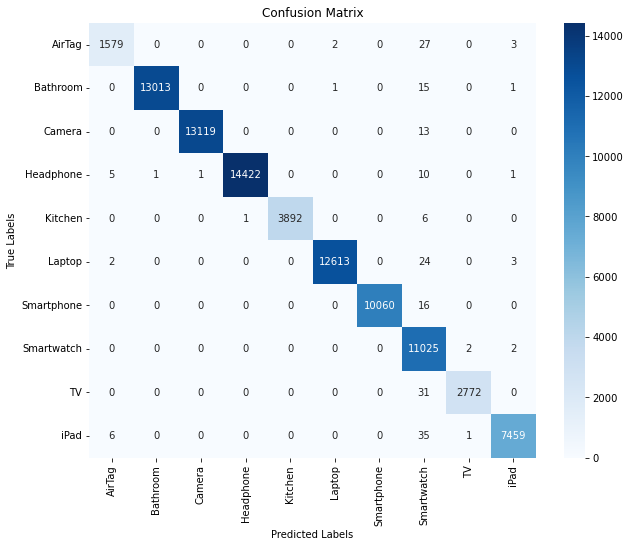

In [15]:
def replace_airtag(label):
    if label == 'Airtag':
        return 'AirTag'
    else:
        return label
class_labels = [replace_airtag(label) for label in label_encoder.classes_]

conf_matrix = confusion_matrix(y_test_labels, y_pred_test)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, 
            yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('Classification/Confusion Matrix MLP1.png', bbox_inches='tight')
plt.show()

## CHECK OVERFITTING

In [32]:
# Comparing training and test accuracies
y_pred_train = np.argmax(model.predict(X_train1), axis=1)
y_pred_test = np.argmax(model.predict(X_test1), axis=1)

train_accuracy = accuracy_score(y_train_labels, y_pred_train)
test_accuracy = accuracy_score(y_test_labels, y_pred_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

25359/25359 ━━━━━━━━━━━━━━━━━━━━ 21s 838us/step
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 3s 953us/step
Train Accuracy: 0.9976622384344268
Test Accuracy: 0.9976819759768419


# TRAIN MLP ON SELECTED FEATURES

Need to preprocess the data again cause not able to open the file 'all_data_final' because of its size

In [50]:
def get_feature_types(df):
    numerical_features = []
    categorical_features = []
    boolean_features = []
    for column_name, column_type in df.dtypes.items():
        if column_type in ['int64', 'float64']:
            numerical_features.append(column_name)
        elif column_type == 'object':
            categorical_features.append(column_name)
        elif column_type == 'bool':
            boolean_features.append(column_name)
    return numerical_features, categorical_features, boolean_features

numerical_features, categorical_features, boolean_features = get_feature_types(data)

def one_hot_encode_features(data, categorical_features):
    if 'label' in categorical_features:
        categorical_features.remove('label')
    if 'subcategory' in categorical_features:
        categorical_features.remove('subcategory')
    data = pd.get_dummies(data, columns=categorical_features, drop_first=True)
    return data

data = one_hot_encode_features(data, categorical_features)
data.fillna(0, inplace=True)

['PDU Type', 'Info', 'Channel Selection Algorithm', 'Tx Address', 'Rx Address', 'Simultaneous LE and BR/EDR to Same Device Capable (Host)', 'Simultaneous LE and BR/EDR to Same Device Capable (Controller)', 'BR/EDR Not Supported', 'LE General Discoverable Mode', 'LE Limited Discoverable Mode', 'label', 'subcategory', 'Packet Direction']
Total number of rows: 901623
Rows with NaN values:


22541/22541 ━━━━━━━━━━━━━━━━━━━━ 17s 738us/step
5636/5636 ━━━━━━━━━━━━━━━━━━━━ 4s 710us/step
Number of features: 1, Train accuracy: 0.7418265404867337, Test accuracy: 0.7393206710106752
22541/22541 ━━━━━━━━━━━━━━━━━━━━ 16s 715us/step
5636/5636 ━━━━━━━━━━━━━━━━━━━━ 4s 749us/step
Number of features: 2, Train accuracy: 0.8234571564041492, Test accuracy: 0.8206294191043948
22541/22541 ━━━━━━━━━━━━━━━━━━━━ 16s 715us/step
5636/5636 ━━━━━━━━━━━━━━━━━━━━ 4s 721us/step
Number of features: 3, Train accuracy: 0.9383486436951163, Test accuracy: 0.9368529044780258
22541/22541 ━━━━━━━━━━━━━━━━━━━━ 16s 701us/step
5636/5636 ━━━━━━━━━━━━━━━━━━━━ 4s 674us/step
Number of features: 4, Train accuracy: 0.9283707981999119, Test accuracy: 0.9270705670317483
22541/22541 ━━━━━━━━━━━━━━━━━━━━ 16s 723us/step
5636/5636 ━━━━━━━━━━━━━━━━━━━━ 4s 784us/step
Number of features: 5, Train accuracy: 0.9678080349591985, Test accuracy: 0.9671814778871483
22541/22541 ━━━━━━━━━━━━━━━━━━━━ 18s 804us/step
5636/5636 ━━━━━━━━━━━━

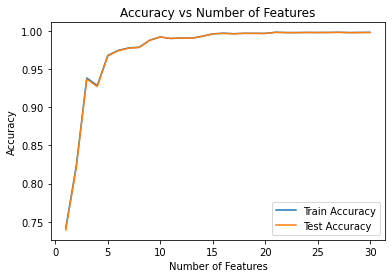

In [30]:
# selected features from filter selection method
top_features = [
    "Nr Forward Packets 1",
    "Number of Packets 1",
    "Sum Payload Length 1",
    "Sum Packet Length 1", 
    "Sum RSSI 1", 
    "Nr Backward Packets 1",
    "Min Payload Length 1",
    "Min Packet Length 1",
    "Min RSSI 1", 
    "Info_ADV_NONCONN_IND",
    "PDU Type_0x2", 
    "LE Limited Discoverable Mode_True", 
    "BR/EDR Not Supported_True", 
    "Duration 1", 
    "Average RSSI 1",
    "Average Packet Length 1", 
    "Average Payload Length 1",
    "Sum of Delta Time 1",
    "Sum Forward Delta Time 1",
    "LE Bluetooth Device Address",
    "Standard Deviation RSSI 1",
    "Flags",
    "16-bit Service Class UUIDs (incomplete)",
    "Tx Address_Random", 
    "Manufacturer Specific_Length",
    "Power Level (dBm)", 
    "Standard Deviation Payload Length 1", 
    "Standard Deviation Packet Length 1",
    "Average Nr Forward Packet 1",
    "Average Nr Backward Packet 1"
]

y = data['label'].values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)
y_categorical = to_categorical(y_encoded, num_classes=num_classes)

train_accuracies = []
test_accuracies = []

# Train the MLP model with the first feature and adding in each loop one feature untill all features are included
for i in range(1, len(top_features) + 1):
    selected_features = top_features[:i]
    X = data[selected_features].values
    
    # proprocess accroding to paper
    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(X)
    X_normalized = X_normalized.astype(np.float32)
    
    # Split the data into training and test datasets
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_categorical, test_size=0.2, random_state=42)
    
    # same model structure as from paper
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_normalized.shape[1],)),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
    
    y_pred_train = np.argmax(model.predict(X_train), axis=1)
    y_pred_test = np.argmax(model.predict(X_test), axis=1)
    y_train_labels = np.argmax(y_train, axis=1)
    y_test_labels = np.argmax(y_test, axis=1)
    
    accuracy_train = accuracy_score(y_train_labels, y_pred_train)
    accuracy_test = accuracy_score(y_test_labels, y_pred_test)
    
    train_accuracies.append(accuracy_train)
    test_accuracies.append(accuracy_test)
    
    print(f'Number of features: {i}, Train accuracy: {accuracy_train}, Test accuracy: {accuracy_test}')

# The best number of features with the highest accuracy
best_num_features = np.argmax(test_accuracies) + 1
print(f'Best number of features: {best_num_features}, Highest Test accuracy: {test_accuracies[best_num_features-1]}')

In [51]:
# Get the training accuracy of the MLP model trained on 27 features
selected_features = top_features[:27]
y = data['label'].values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)
y_categorical = to_categorical(y_encoded, num_classes=num_classes)

X = data[selected_features].values

# proprocess accroding to paper
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized = X_normalized.astype(np.float32)

# Split the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_categorical, test_size=0.2, random_state=42)

# Train the MLP model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_normalized.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

y_pred_train = np.argmax(model.predict(X_train), axis=1)
y_train_labels = np.argmax(y_train, axis=1)
accuracy_train = accuracy_score(y_train_labels, y_pred_train)
print(f'Training accuracy with 27 features: {accuracy_train}')

22541/22541 ━━━━━━━━━━━━━━━━━━━━ 19s 839us/step
Training accuracy with 27 features: 0.9978608009449631
